In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
news = pd.read_csv('news.csv',delimiter=',')
news.head()

,news,true_labels
0,Timnas Indonesia U-23 kalah tipis 2-3 dari Aus...,1
1,Sebagian wanita mungkin mengalami rambut ronto...,1
2,Seorang sumber dari jajaran militer Sudan meny...,0
3,Mama Rosa kembali menerima teror berupa sebuah...,0
4,"Pembelajaran tatap muka di SMKN 1 Sedayu, Bant...",0


C:\Users\fahri\anaconda3\envs\tf14\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


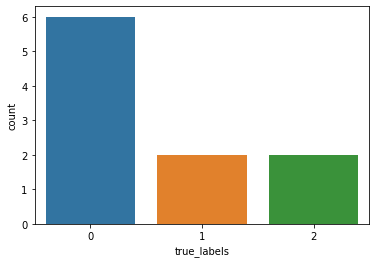

In [3]:
sns.countplot(news.true_labels)
plt.show()

<AxesSubplot:ylabel='Frequency'>

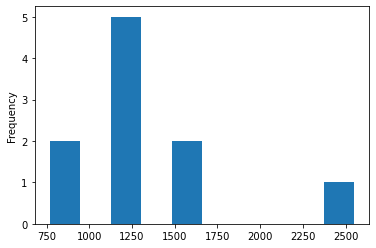

In [4]:
news['news'].str.len().plot.hist()

C:\Users\fahri\anaconda3\envs\tf14\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='true_labels', ylabel='Density'>

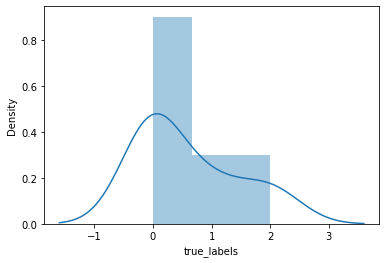

In [5]:
sns.distplot(a=news['true_labels'], kde=True)

# predicting

In [6]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tensorflow.keras.preprocessing.sequence import pad_sequences
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model
import numpy as np
import pickle
import sys
import re

In [7]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

factory_stopword = StopWordRemoverFactory()
stopword = factory_stopword.create_stop_word_remover()

labels = ['Negative','Neutral','Positive']

naive_bayes = pickle.load(open("models/naive_bayes.pkl","rb"))
mlp = pickle.load(open("models/mlp.pkl","rb"))
logistic_regression = pickle.load(open("models/logistic_regression.pkl","rb"))

deep_learning_model = load_model("models/model_3-content-06-0.35.h5")
print(deep_learning_model.summary())

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 128, 50)           1894500   
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 126, 32)           4832      
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 124, 64)           6208      
___________________________________________

In [8]:
def tokenize(text):
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(text)

    text_sequences = tokenizer.texts_to_sequences(text)
    text_padded = pad_sequences(text_sequences,
                                 maxlen=128,
                                 truncating='post',
                                 padding='post')
    return text_padded
    


def getClean(text):
    text = str(text).lower().replace('\\', '').replace('_', ' ') # case folding
    text = re.sub(r'http\S+', " ", text)    # remove urls (punctuation)
    text = re.sub(r'@\w+',' ', text)         # remove mentions
    text = re.sub(r'#\w+', ' ', text)       # remove hastags
    text = re.sub('r<.*?>',' ', text)       # remove html tags
    text = re.sub("(.)\\1{2,}", "\\1", text)
    text = re.sub("\n", "", text)           # remove new line
    
    # Stemming
    text = stemmer.stem(text)
    
    # Stopword
    text = stopword.remove(text)
    return text

In [9]:
data = news['news'].apply(lambda row: getClean(row))

In [10]:
y_pred_submission = []

for word in data:
    naive_bayes_predict = np.int(naive_bayes.predict([word]))
    mlp_predict = np.int(mlp.predict([word]))
    logistic_regression_predict = np.int(logistic_regression.predict([word]))

    deep_learning_predict = np.int(
            np.max(deep_learning_model.predict(tokenize(word))
    ))

    y_pred_submission.append(
        [
            naive_bayes_predict,
            mlp_predict,
            logistic_regression_predict,
            deep_learning_predict
        ]
    )
    print(len(word))
    print('Naive bayes : {}, Multi layer perceptron : {}, Logistic regression : {}, Deep learning : {}'.format(
        naive_bayes_predict, mlp_predict, logistic_regression_predict, deep_learning_predict
    ))

509
Naive bayes : 1, Multi layer perceptron : 2, Logistic regression : 2, Deep learning : 0
575
Naive bayes : 0, Multi layer perceptron : 0, Logistic regression : 0, Deep learning : 0
906
Naive bayes : 0, Multi layer perceptron : 0, Logistic regression : 0, Deep learning : 0
811
Naive bayes : 0, Multi layer perceptron : 0, Logistic regression : 0, Deep learning : 0
827
Naive bayes : 0, Multi layer perceptron : 1, Logistic regression : 0, Deep learning : 0
902
Naive bayes : 0, Multi layer perceptron : 0, Logistic regression : 0, Deep learning : 0
1068
Naive bayes : 0, Multi layer perceptron : 2, Logistic regression : 0, Deep learning : 0
850
Naive bayes : 1, Multi layer perceptron : 1, Logistic regression : 1, Deep learning : 0
1172
Naive bayes : 1, Multi layer perceptron : 1, Logistic regression : 2, Deep learning : 0
1749
Naive bayes : 2, Multi layer perceptron : 2, Logistic regression : 2, Deep learning : 0


In [11]:
y_pred_submission

[[1, 2, 2, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 0, 0],
 [0, 2, 0, 0],
 [1, 1, 1, 0],
 [1, 1, 2, 0],
 [2, 2, 2, 0]]

In [12]:
submission = pd.read_csv('submission.csv',delimiter=',')
submission.head()

,true_labels
0,1
1,1
2,0
3,0
4,0


In [13]:
df = pd.DataFrame(data = y_pred_submission ,columns=['naive_bayes','mlp','logisitic_regression','deep_learning'])
df

,naive_bayes,mlp,logisitic_regression,deep_learning
0,1,2,2,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,1,0,0
5,0,0,0,0
6,0,2,0,0
7,1,1,1,0
8,1,1,2,0
9,2,2,2,0


In [14]:
df = pd.concat([submission, df], axis=1)
df.to_csv('submission-0.csv', encoding="UTF-8", index=False)
df

,true_labels,naive_bayes,mlp,logisitic_regression,deep_learning
0,1,1,2,2,0
1,1,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,1,0,0
5,2,0,0,0,0
6,0,0,2,0,0
7,0,1,1,1,0
8,0,1,1,2,0
9,2,2,2,2,0


array([[<AxesSubplot:title={'center':'true_labels'}>,
        <AxesSubplot:title={'center':'naive_bayes'}>],
       [<AxesSubplot:title={'center':'mlp'}>,
        <AxesSubplot:title={'center':'logisitic_regression'}>],
       [<AxesSubplot:title={'center':'deep_learning'}>, <AxesSubplot:>]],
      dtype=object)

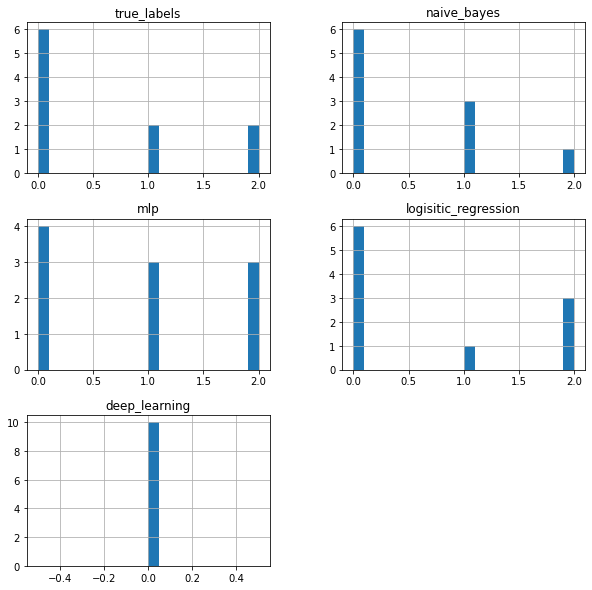

In [15]:
df.hist(bins=20, figsize=(10, 10))